http://vxy10.github.io/p6_vis_versions/scroll_Submission1/index.html
Missing Data (Areas of improvements): 1- Directions of the flight: Customer complaints might be related to certain airports. 2- Price& Category of airlines: 3- type of traveller: Any information that can be obtained about the twitter profile.

In [1]:
# mount the drive and set the path
import keras
from google.colab import drive
drive.mount('/content/drive')


Using TensorFlow backend.


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
#import pandas and numpy and then read the csv file
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('drive/My Drive/data_mining/Tweets.csv')
df.head(3)

tweet_id  ...               user_timezone
0  570306133677760513  ...  Eastern Time (US & Canada)
1  570301130888122368  ...  Pacific Time (US & Canada)
2  570301083672813571  ...  Central Time (US & Canada)

[3 rows x 15 columns]

In [0]:
#setting random
import random
random.seed(123)
# random shuffle
from sklearn.utils import shuffle
df = shuffle(df)

# Plot the percentage of reviews per airline

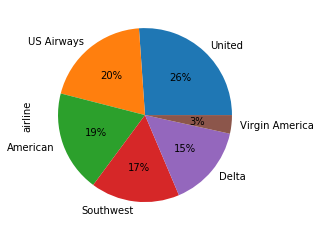

In [0]:
df.airline.value_counts().plot(kind='pie', autopct='%1.0f%%')

# Plot the percentage of reviews per sentiment

In [0]:
df['']

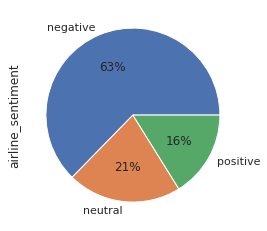

In [0]:
df.airline_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%')


# Vizualizing the count of sentiments


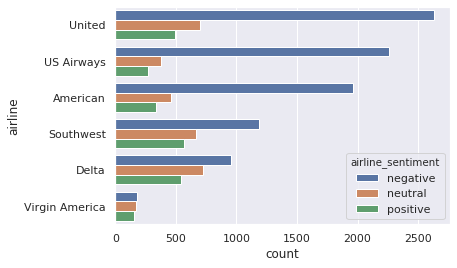

In [0]:
import seaborn as sns
sns.set(style="darkgrid")

ax = sns.countplot(y='airline', hue="airline_sentiment", data=df,order = df['airline'].value_counts().index)

#Sentiment plot per airline




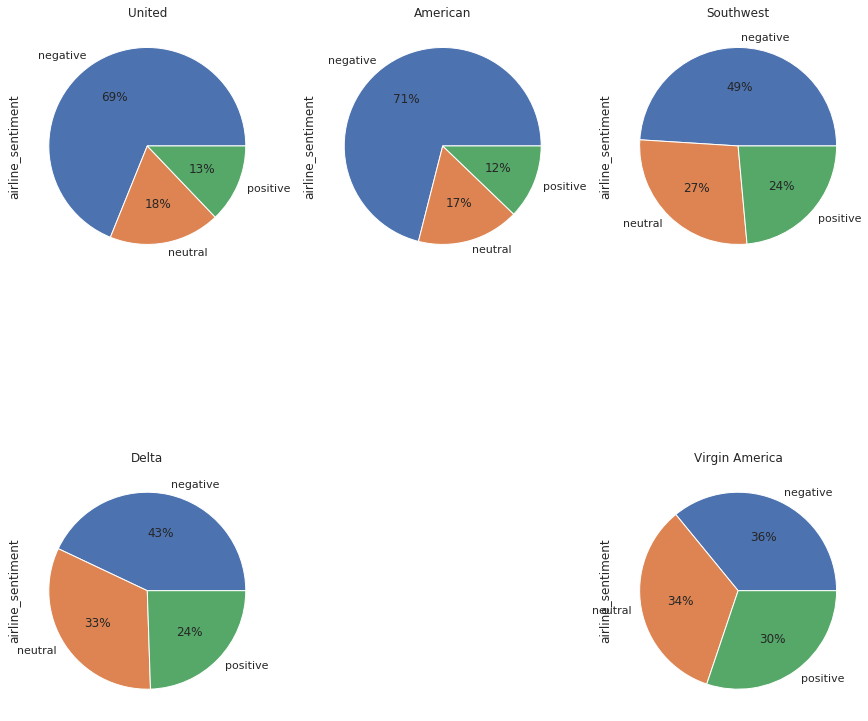

In [0]:
l = df.groupby('airline')
a=l.get_group('United')
b=l.get_group('American')
c=l.get_group('Southwest')
d=l.get_group('Delta')
e=l.get_group('Virgin America')
plt.subplot(2, 3, 1)
a.airline_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%',figsize=(15,15),title='United')
plt.subplot(2, 3, 2)
b.airline_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%',figsize=(15,15),title='American')
plt.subplot(2, 3, 3)
c.airline_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%',figsize=(15,15),title='Southwest')
plt.subplot(2, 3, 4)
d.airline_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%',figsize=(15,15),title='Delta')
plt.subplot(2, 3, 6)
e.airline_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%',figsize=(15,15),title='Virgin America')

In [0]:
#df.airline_sentiment.hist(by=df.airline,figsize=(12,12))

#Negative reasons plot

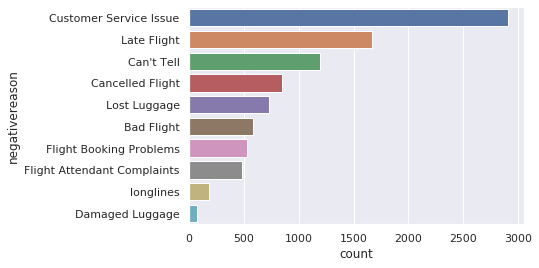

In [0]:
ax = sns.countplot(y="negativereason", data=df,order = df['negativereason'].value_counts().index)

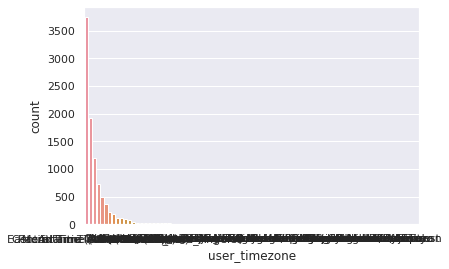

In [0]:

ax = sns.countplot(x="user_timezone",data=df,order = df['user_timezone'].value_counts().index)

# Count of missing values.


In [0]:
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

#Visualizing missing values. Here the columns are sorted in decreasing order of missing values.


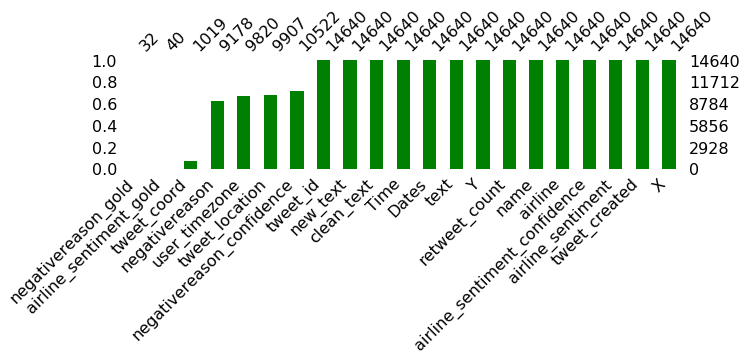

In [34]:
import missingno as msno
msno.bar(df, sort='ascending',figsize=(10, 2), color='green') 

In [0]:
def word_count(sentence):
    return len(sentence.split())
    
df['wordcount'] = df['text'].apply(word_count)
df.head(3)

tweet_id  ... wordcount
11283  568244413031448577  ...        23
12994  569965247093731328  ...        14
9573   569870248779902976  ...        27

[3 rows x 16 columns]

# plot word count distribution for both positive and negative sentiments


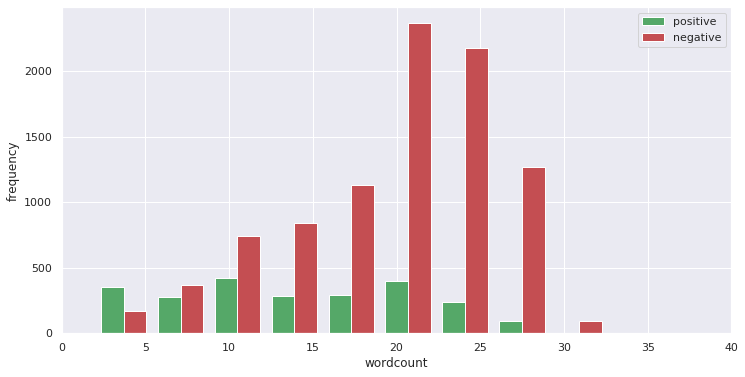

In [0]:
x = df['wordcount'][df.airline_sentiment == 'positive']
y = df['wordcount'][df.airline_sentiment == 'negative']
plt.figure(figsize=(12,6))
plt.xlim(0,40)
plt.xlabel('wordcount')
plt.ylabel('frequency')
g = plt.hist([x, y], color=['g','r'], alpha=1, label=['positive','negative'])
plt.legend(loc='upper right')


In [0]:
#split data and time
df['Dates'] = pd.to_datetime(df['tweet_created']).dt.date
df['Time'] = pd.to_datetime(df['tweet_created']).dt.time


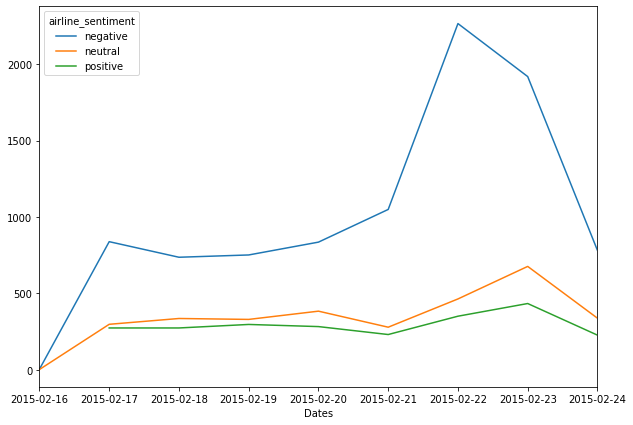

In [8]:

fig, ax = plt.subplots(figsize=(10,7))

# use unstack()
df.groupby(['Dates','airline_sentiment']).count()['tweet_id'].unstack().plot(ax=ax)



Removing Twitter Handles (@user)

In [0]:
import re
def remove_handles(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt 

# remove twitter handles (@user)
df['clean_text'] = np.vectorize(remove_handles)(df['text'], "@[\w]*") 

Removing Punctuations, Numbers, and Special Characters

In [0]:
df['clean_text'] = df['clean_text'].str.replace("[^a-zA-Z#]", " ")

Removing Short Words

In [0]:
df['clean_text'] = df['clean_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [7]:
df.head()

tweet_id  ...                                         clean_text
11393  568148808993013761  ...  What point baggage claim ticket they scan trac...
9890   569625014179377152  ...  guys please give update Been sitting Tarmac fl...
3461   568424307031805952  ...  that what have been told refund doesn really m...
214    569237252154372097  ...  access your website from Safari iPhone Seems w...
555    570282089863626752  ...  then have received call back been days infant ...

[5 rows x 16 columns]

# plot word frequency distribution of first few words


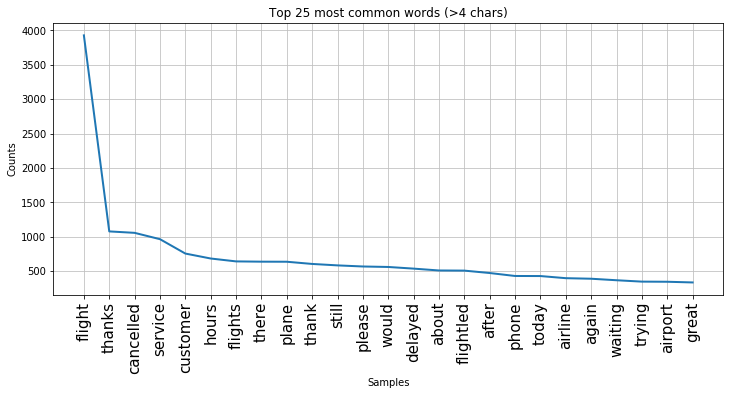

In [13]:
from collections import Counter
import nltk
all_words = []
for line in list(df['clean_text']):
    words = line.split()
    for word in words:
      if len(word)>4:
        all_words.append(word.lower())
Counter(all_words).most_common(10)    
    
plt.figure(figsize=(12,5))
plt.title('Top 25 most common words (>4 chars)')
plt.xticks(fontsize=15, rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(25,cumulative=False)


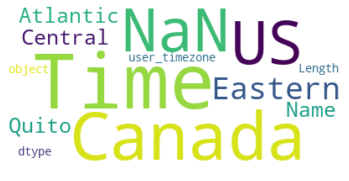

In [0]:
    import matplotlib.pyplot as plt
    from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
    from keras.preprocessing.image import load_img
    #words = df.text[10]
    
    #airplane_mask = np.array(Image.open(os.path.join(file, "airplane.png")))
    wordcloud = WordCloud(background_color='white').generate(str(df['user_timezone']))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

tokenization

In [8]:
tokenized_tweet = df['clean_text'].apply(lambda x: x.split())
tokenized_tweet.head()

11393    [What, point, baggage, claim, ticket, they, sc...
9890     [guys, please, give, update, Been, sitting, Ta...
3461     [that, what, have, been, told, refund, doesn, ...
214      [access, your, website, from, Safari, iPhone, ...
555      [then, have, received, call, back, been, days,...
Name: clean_text, dtype: object

In [9]:
import nltk
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [lemmatizer.lemmatize(i) for i in x]) # Lemmatization
tokenized_tweet.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


11393    [What, point, baggage, claim, ticket, they, sc...
9890     [guy, please, give, update, Been, sitting, Tar...
3461     [that, what, have, been, told, refund, doesn, ...
214      [access, your, website, from, Safari, iPhone, ...
555      [then, have, received, call, back, been, day, ...
Name: clean_text, dtype: object

In [16]:
df.head()

tweet_id  ...                                         clean_text
11393  568148808993013761  ...      What point baggage claim ticket scan tracking
9890   569625014179377152  ...  guys please give update Been sitting Tarmac fl...
3461   568424307031805952  ...  told refund really makeup inconvenience caused...
214    569237252154372097  ...  access website Safari iPhone Seems work iPad N...
555    570282089863626752  ...  received call back days infant seat supposed a...

[5 rows x 16 columns]

Stemming-stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word

In [0]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_tweet1 = df['clean_text'].apply(lambda x: x.split())
tokenized_tweet1 = tokenized_tweet1.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet1.head()

8069     [battl, appeas, passeng, wall, street, lake, w...
1479             [oti, baggag, claim, happi, nearli, piss]
9147     [pilot, forget, show, work, ricki, gate, agent...
10239    [guess, weather, been, rough, have, been, tri,...
7501     [wife, with, they, wouldn, even, plane, daught...
Name: clean_text, dtype: object

In [0]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

df['clean_text'] = tokenized_tweet

In [0]:
    df['new_text']=df['clean_text'].str.replace("flight", " ")
    df['new_text']=df['clean_text'].str.replace("airline", " ")

In [11]:
import nltk
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
df['clean_text'] = df['clean_text'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop_words]))

In [15]:
df.head()

tweet_id  ...                                         clean_text
11393  568148808993013761  ...      What point baggage claim ticket scan tracking
9890   569625014179377152  ...  guys please give update Been sitting Tarmac fl...
3461   568424307031805952  ...  told refund really makeup inconvenience caused...
214    569237252154372097  ...  access website Safari iPhone Seems work iPad N...
555    570282089863626752  ...  received call back days infant seat supposed a...

[5 rows x 16 columns]

In [0]:
df.head()

tweet_id  ...  Y
11283  568244413031448577  ... -1
12994  569965247093731328  ... -1
9573   569870248779902976  ... -1
4427   570261349172973569  ...  0
11662  567842370533867520  ... -1

[5 rows x 22 columns]

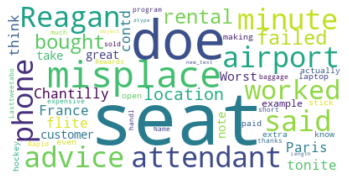

In [0]:

wordcloud = WordCloud(background_color='white').generate(str(df['new_text']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

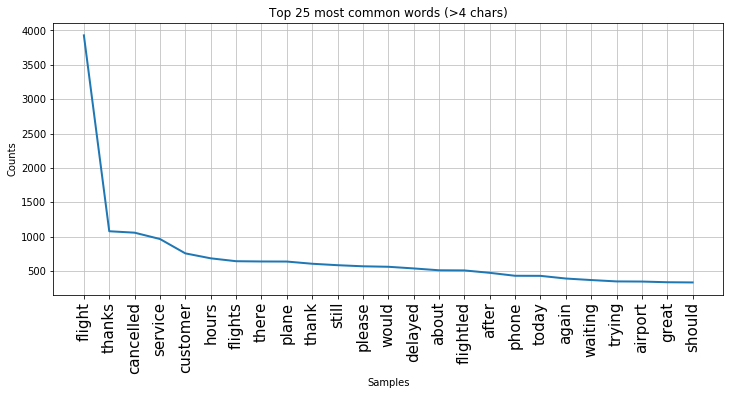

In [19]:
from collections import Counter
import nltk
all_words = []
for line in list(df['new_text']):
    words = line.split()
    for word in words:
      if len(word)>4:
        all_words.append(word.lower())
Counter(all_words).most_common(10)    
    
plt.figure(figsize=(12,5))
plt.title('Top 25 most common words (>4 chars)')
plt.xticks(fontsize=15, rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(25,cumulative=False)

worldcloud for positive

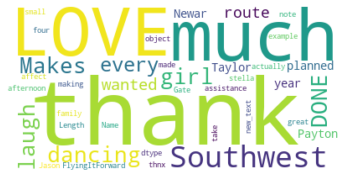

In [0]:
    wordcloud = WordCloud(background_color='white').generate(str(df['new_text'][df['airline_sentiment'] == 'positive']))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [0]:
worldcloud for negative

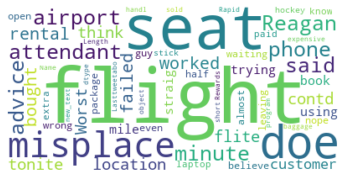

In [0]:
    wordcloud = WordCloud(background_color='white').generate(str(df['new_text'][df['airline_sentiment'] == 'negative']))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

worldcloud for neutral

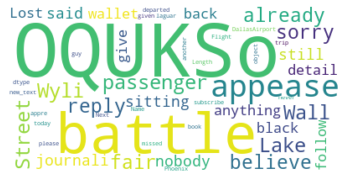

In [0]:
    wordcloud = WordCloud(background_color='white').generate(str(df['new_text'][df['airline_sentiment'] == 'neutral']))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [0]:
#Heatmap shows the correlation of missingness between every 2 columns. 
#A value near -1 means if one variable appears then the other variable is very likely to be missing.
#A value near 0 means there is no dependence between the occurrence of missing values of two variables.
#A value near 1 means if one variable appears then the other variable is very likely to be present.
#msno.heatmap(df,figsize=(8, 4))
#msno.dendrogram(df,figsize=(10, 3))

In [0]:
Understanding the impact of Hashtags on tweets sentiment

In [0]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        hashtag = re.findall(r"#(\w+)", i)
        hashtags.append(hashtag)

    return hashtags

In [0]:
# extracting hashtags from positive tweets

HT_positive = hashtag_extract(df['text'][df['airline_sentiment'] == 'positive'])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(df['text'][df['airline_sentiment'] == 'negative'])

# extracting hashtags from racist/sexist tweets
HT_neutral = hashtag_extract(df['text'][df['airline_sentiment'] == 'neutral'])

# unnesting list


In [0]:
HT_positive = sum(HT_positive,[])
HT_negative = sum(HT_negative,[])
HT_neutral=sum(HT_neutral,[])

In [0]:
plotting the graph:

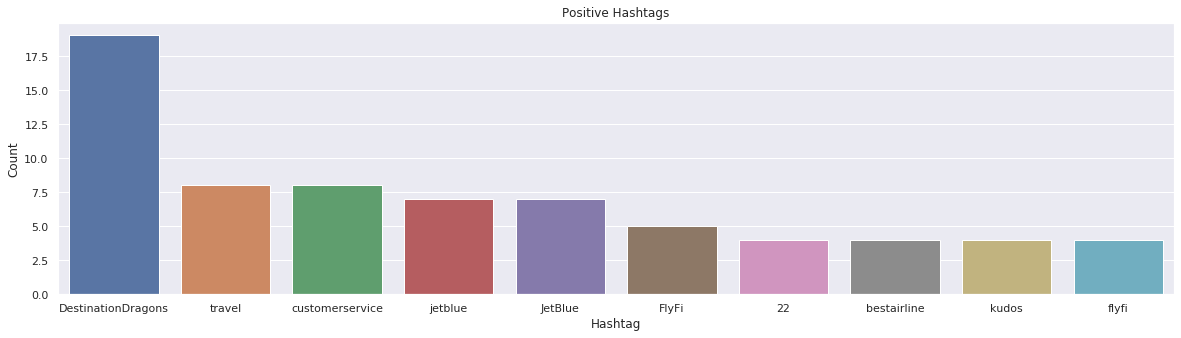

In [0]:
a = nltk.FreqDist(HT_positive)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(20,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count',title='Positive Hashtags')
plt.show()

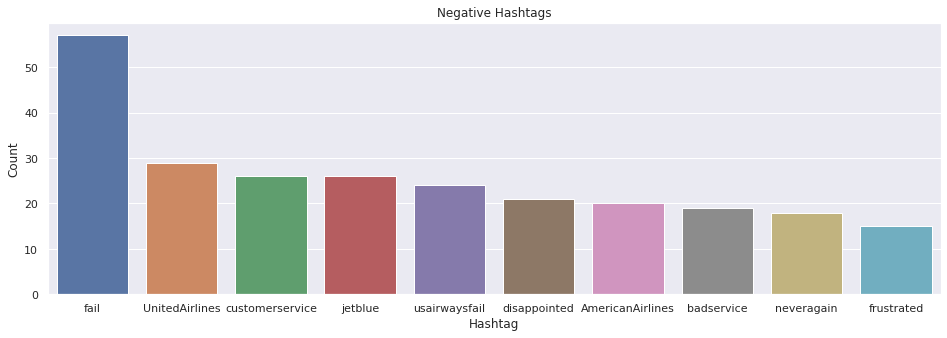

In [0]:
b = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(b.keys()),
                  'Count': list(b.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count',title='Negative Hashtags')
plt.show()

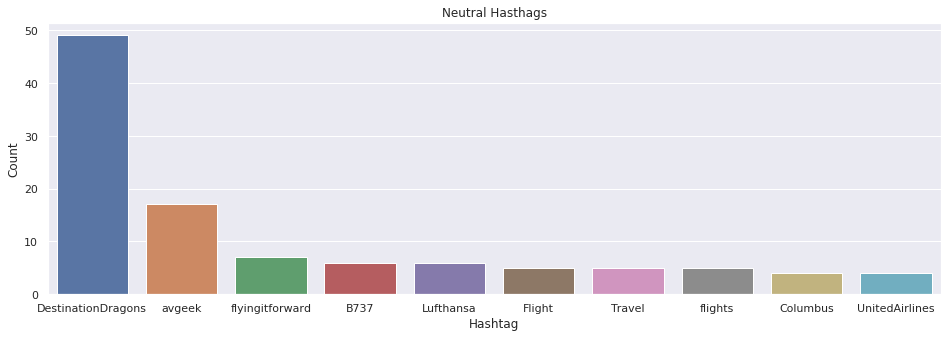

In [0]:
c = nltk.FreqDist(HT_neutral)
d = pd.DataFrame({'Hashtag': list(c.keys()),
                  'Count': list(c.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count',title='Neutral Hasthags')
plt.show()

In [0]:
maxlen = 100
training_samples = 200
validation_samples = 10000
max_words = 10000

mytokenizer = Tokenizer(num_words=max_words)
mytokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)


In [0]:
#Preprocessing Data
#Lowercase all the words
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

max_features = 5000
mytokenizer=Tokenizer(num_words=max_features, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
                                   lower=True, split=' ', char_level=False, oov_token=None)
#mytokenizer.plot()

In [0]:

data=mytokenizer.fit_on_texts(df['text'])
vocab_size = len(mytokenizer.word_index) + 1
print("Total words", vocab_size)
print("word_index : ",mytokenizer.word_index)

Total words 15769
Found 15768 unique tokens.


word_counts: A dictionary of words and their counts.
word_docs: A dictionary of words and how many documents each appeared in.
word_index: A dictionary of words and their uniquely assigned integers.
document_count:An integer count of the total number of documents that were used to fit the Tokenizer.

In [0]:
print("word_docs : ",mytokenizer.word_docs)
d=mytokenizer.word_docs
lists = sorted(d.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()

In [0]:

X = mytokenizer.texts_to_sequences(df['new_text'])
X = pad_sequences(X)
print(X)

NameError: ignored

In [0]:
#Strip Punctuation

In [0]:
#strip stopwords

In [0]:
#Stemming

In [0]:
#Lemmatization

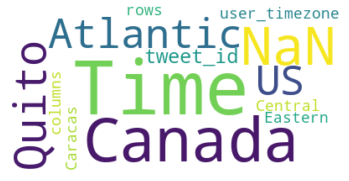

In [0]:
    #word cloud below shows the most common words in our dataset.
    import matplotlib.pyplot as plt
    from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
    from keras.preprocessing.image import load_img
    #words = df.text[10]
    
    #airplane_mask = np.array(Image.open(os.path.join(file, "airplane.png")))
    wordcloud = WordCloud(background_color='white').generate(str(df))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [0]:
from keras.preprocessing.text import Tokenizer
X = Tokenizer.texts_to_sequences(df['new_text'])

TypeError: ignored

In [0]:
#splitting the dataset into training and validation sets
from sklearn.model_selection import train_test_split
Y = pd.get_dummies(df['airline_sentiment']).values
X_train, X_val, Y_train, Y_val = train_test_split(X,Y, test_size = 0.20, random_state = 123)
print(X_train.shape,Y_train.shape)
print(X_val.shape,Y_val.shape)

NameError: ignored

In [0]:
#this will map categorical to numerical values
map = {'neutral': 0, 'positive':1,'negative':-1}
df['Y'] = df['airline_sentiment'].map(map)

In [0]:
#increasing Accuracy using n-gram
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
df['X'] = count_vect.fit_transform(df['new_text'].values)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(df['new_text'],
                                                                    df['Y'],test_size=0.2)

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(df['new_text'])
X_train = Tfidf_vect.transform(X_train)
X_val = Tfidf_vect.transform(X_val)

In [25]:
print(X_train.shape,Y_train.shape)
print(X_val.shape,Y_val.shape)

(11712, 5000) (11712,)
(2928, 5000) (2928,)


In [0]:
#Given that the feature vector list is densely sparse in nature, 
#it made sense to apply L2 normalization (xˆ = x/ ||x||) 
#which is a useful technique to deal with the sparseness of data. 
#To achieve this, I used the inbuilt function provided by scikitlearn library.

In [27]:
#Sentiment Prediction using Logistic Regression
from sklearn.linear_model import LogisticRegression
Logistic = LogisticRegression(C=0.2, dual=True)
Logistic.fit(X_train, Y_train)
predictions_Log = Logistic.predict(X_val)
accuracy = (predictions_Log == Y_val).mean()
print("Logistic Regression -> ",accuracy*100)

Logistic Regression ->  71.9603825136612


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Naive Bayes models are probabilistic classifiers that use the Bayes theorem and make a strong assumption that the features of the data are independent. For our case, this means that each word is independent of others.

In [32]:
#Sentiment Prediction using Naive Bayes
# fit the training dataset on the NB classifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
Naive = MultinomialNB()
Naive.fit(X_train,Y_train)
# predict the labels on validation dataset
predictions_NB = Naive.predict(X_val)

# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Y_val)*100)
print("confusion_matrix -> ")
print(confusion_matrix(predictions_NB, Y_val)) 
print ("Naive Bayes classification_report -> ")
print(classification_report(predictions_NB, Y_val))


Naive Bayes Accuracy Score ->  72.91666666666666
confusion_matrix -> 
[[1810  451  268]
 [  23  147   23]
 [   5   23  178]]
Naive Bayes classification_report -> 
              precision    recall  f1-score   support

          -1       0.98      0.72      0.83      2529
           0       0.24      0.76      0.36       193
           1       0.38      0.86      0.53       206

    accuracy                           0.73      2928
   macro avg       0.53      0.78      0.57      2928
weighted avg       0.89      0.73      0.78      2928



73.12158469945356


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


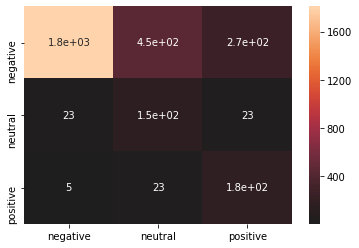

In [29]:
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    import matplotlib.pyplot as plt
   
    cm =confusion_matrix(predictions_NB, Y_val) 
    index = ['negative','neutral','positive']  
    columns = ['negative','neutral','positive']  
    cm_df = pd.DataFrame(cm,columns,index)                      
  
    sns.heatmap(cm_df, annot=True,center=0)

In [0]:
df.head()

tweet_id  ...                                                  X
11283  568244413031448577  ...    (0, 2580)\t1\n  (0, 5816)\t1\n  (0, 594)\t1\...
12994  569965247093731328  ...    (0, 2580)\t1\n  (0, 5816)\t1\n  (0, 594)\t1\...
9573   569870248779902976  ...    (0, 2580)\t1\n  (0, 5816)\t1\n  (0, 594)\t1\...
4427   570261349172973569  ...    (0, 2580)\t1\n  (0, 5816)\t1\n  (0, 594)\t1\...
11662  567842370533867520  ...    (0, 2580)\t1\n  (0, 5816)\t1\n  (0, 594)\t1\...

[5 rows x 21 columns]

In [0]:
model = Sequential()
model.add(Dense(1024, input_shape=(3072,), activation="sigmoid"))
model.add(Dense(512, activation="sigmoid"))
model.add(Dense(len(lb.classes_), activation="softmax"))

In [0]:
#Sentiment Prediction using RNN

In [166]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, SpatialDropout1D
max_features=5000
embed_dim = 100
lstm_out = 256
model = Sequential()
model.add(Embedding(max_features, embed_dim,input_length =30))
model.add(Dropout(0.5))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 30, 100)           500000    
_________________________________________________________________
dropout_7 (Dropout)          (None, 30, 100)           0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 256)               365568    
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 771       
Total params: 866,339
Trainable params: 866,339
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
from keras.utils import to_categorical
Y_val = to_categorical(Y_train)

In [167]:
history = model.fit(X_train, Y_train,epochs = 6, batch_size=32,  validation_data=(X_val, Y_val))
                                        

ValueError: ignored

In [0]:
# plotting training vs validation loss
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

NameError: ignored

In [0]:
# Plotting training vs validation accuracy
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [20]:
# format your input for the neural net
    import keras.preprocessing.text as kpt

    user_input = input('Input a sentence to be evaluated: ')
    from sklearn.feature_extraction.text import CountVectorizer
    count_vect = CountVectorizer()
    clean = count_vect.fit_transform(user_input.values)

    from sklearn.feature_extraction.text import TfidfVectorizer
    Tfidf_vect = TfidfVectorizer(max_features=5000)
    new=Tfidf_vect.fit([clean])
    input1 = Tfidf_vect.transform(new)
    
    #evalSentence=np.array(user_input)
   
    #testArr = convert_text_to_index_array(evalSentence)
    #input = tokenizer.sequences_to_matrix([evalSentence], mode='binary')
    # predict which bucket your input belongs in
    #test_sample_token=tokenizer.texts_to_sequences(evalSentence)
    #test_sample_token_pad=pad_sequences(test_sample_token)
    #pred = model.predict(x=test_sample_token_pad)
   
    #tokens = Tfidf_vect.fit([user_input])    
    #instance = pad_sequences(tokens, maxlen=33)

    prediction=Naive.predict(np.array(input1))
    print(prediction)
    # and print it for the humons
    #print("%s sentiment; %f%% confidence" % (labels[np.argmax(pred)], pred[0][np.argmax(pred)] * 100))
    print("Prediction (0 = negative, 1 = positive) = ", end="")
    print("%0.4f" % prediction[0][0])

Input a sentence to be evaluated: hATE


AttributeError: ignored

In [0]:
twt = ['good service']
#vectorizing the tweet by the pre-fitted tokenizer instance
twt = mytokenizer.texts_to_sequences(twt)
#padding the tweet to have exactly the same shape as `embedding_2` input
twt = pad_sequences(twt, maxlen=33, dtype='int32', value=0)
print(twt)
sentiment = model.predict(twt,batch_size=1,verbose = 2)[0]
if(np.argmax(sentiment) == 0):
    print("negative")
elif (np.argmax(sentiment) == 1):
    print("positive")